In [48]:
%%html
<style>
/* Any CSS style can go in here. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import polars as pl

cols = ['Experiment', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

sns.set(style="darkgrid", palette="Set2")

pl.Config(tbl_rows=30)

In [50]:
m = pl.read_csv("external_data/PRECISE2_metadata.tsv", separator="\t")
d = pl.read_csv("external_data/PRECISE2_counts.csv")
d

Geneid,ecoli_00178,ecoli_00188,ecoli_00825,ecoli_00057,ecoli_00471,ecoli_00215,ecoli_00270,ecoli_00100,ecoli_00019,ecoli_00837,ecoli_00005,ecoli_00726,ecoli_00033,ecoli_00227,ecoli_00260,ecoli_00042,ecoli_00187,ecoli_00286,ecoli_00306,ecoli_00762,ecoli_00072,ecoli_00134,ecoli_00613,ecoli_00032,ecoli_00563,ecoli_00330,ecoli_00123,ecoli_00749,ecoli_00658,ecoli_00289,ecoli_00086,ecoli_00435,ecoli_00535,ecoli_00119,ecoli_00181,ecoli_00400,…,ecoli_00448,ecoli_00368,ecoli_00586,ecoli_00374,ecoli_00098,ecoli_00647,ecoli_00093,ecoli_00004,ecoli_00425,ecoli_00013,ecoli_00399,ecoli_00517,ecoli_00063,ecoli_00699,ecoli_00834,ecoli_00300,ecoli_00777,ecoli_00172,ecoli_00445,ecoli_00084,ecoli_00221,ecoli_00625,ecoli_00067,ecoli_00641,ecoli_00609,ecoli_00302,ecoli_00074,ecoli_00393,ecoli_00800,ecoli_00195,ecoli_00265,ecoli_00037,ecoli_00419,ecoli_00567,ecoli_00784,ecoli_00544,ecoli_00338
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""b0001""",1033,64,1079,464,19,1515,52,761,13,477,651,0,8,484,328,99,81,294,73,1143,255,71,585,553,41,278,22,1180,13942,509,20,300,140,7,450,169,…,748,79,543,56,4,7597,74,60,227,75,84,188,114,4884,250,279,315,619,152,60,339,4356,45,4454,73,60,1455,258,435,363,372,5,238,677,101,48,385
"""b0002""",4831,47376,29852,4125,715,36396,13114,15639,3164,45157,37670,2,32386,18642,879,23258,45596,26190,21692,12426,5822,39559,42279,12496,376,78641,17497,18543,24982,50788,3918,13564,19194,18897,31252,6681,…,27448,1046,23677,768,920,24232,22661,62824,10912,13290,5633,31136,3114,22966,44921,20063,23391,23315,6261,36536,18926,44420,2014,41959,10337,18903,35932,16736,6609,34432,22045,7387,25654,32192,19660,1827,56611
"""b0003""",1216,14035,8113,1467,595,11199,5566,4338,1692,11223,13110,0,8808,5777,450,7669,13547,7903,7565,3999,1822,8452,11457,3877,284,23053,5081,4808,8195,14895,1872,4339,6068,5965,9064,2192,…,7334,346,6525,301,433,7503,6634,24740,3281,4951,1754,8096,995,6842,11068,5363,7096,6984,1674,7208,5686,11347,1066,11589,3150,4691,11215,4794,2414,10421,5903,2445,7398,7113,4766,719,16584
"""b0004""",1201,18761,10339,1528,658,14476,8043,5340,1342,14016,12802,3,8222,8237,533,7575,17399,11481,9548,6163,2528,10832,13217,4540,383,26664,5507,5846,9673,19520,1205,6593,7949,6817,13509,3259,…,10424,473,9550,444,470,8895,7814,15589,5512,4772,2440,8948,1361,9043,13844,7920,10424,9660,2189,8892,6734,13927,707,12847,3216,6161,10963,7401,2257,13940,6350,2886,12073,9795,7853,821,20620
"""b0005""",77,250,161,42,161,315,270,304,53,241,386,11,75,239,9,137,249,202,177,352,60,259,764,85,48,659,76,3813,872,421,27,218,304,100,350,128,…,199,104,393,146,13,456,205,159,185,85,103,527,47,480,269,175,575,197,84,255,170,599,47,427,211,183,264,233,69,315,101,34,348,424,295,98,257
"""b0006""",299,848,550,226,150,919,1391,324,760,823,650,8,577,578,149,449,894,675,427,531,162,611,291,444,5102,1248,407,236,677,852,368,595,419,567,694,450,…,2093,171,974,225,133,747,420,605,557,298,299,188,65,775,746,346,854,568,548,454,427,946,270,622,346,497,388,548,134,704,799,306,630,501,519,1709,2146
"""b0007""",160,269,91,44,147,158,604,49,145,130,114,29,101,91,77,65,249,81,459,49,41,150,412,98,153,267,65,196,98,95,62,47,879,67,62,66,…,224,66,63,59,27,201,79,116,38,39,58,79,16,160,115,46,95,83,98,141,73,193,179,334,365,182,464,54,50,95,208,34,85,438,169,175,138
"""b0008""",7288,23266,11841,5510,24991,18950,9291,7509,8222,12762,15042,5,11719,11258,2771,8595,23363,12769,10264,13381,2697,19092,12151,7418,4003,23207,7870,16922,13310,14349,9677,11039,8142,11905,16932,8945,…,13204,3542,16576,4882,3714,14506,10058,12032,10439,6749,6419,3306,2175,17117,13990,9453,16988,11760,12126,10722,8276,23473,3397,20311,8231,12249,9297,10938,2994,19876,14584,5539,14735,17123,14180,4129,13308
"""b0009""",336,591,149,197,598,452,226,257,193,269,

In [51]:
# select only ICA
# m = m.filter((pl.col("study") == "ICA") & pl.col("condition_id").is_in(["wt_glc", "no3_anaero"]))
# m.select("condition_id").unique().to_numpy()

In [52]:
# melt data
dm = d.melt(id_vars="Geneid", variable_name="Experiment", value_name="Gene_count")
dj = dm.join(m, on="Experiment", how="left", coalesce=True)

cols = ['Experiment', 'Geneid', 'Gene_count', 'study', 'condition_id', 'rep_id', 'creator', 'run_date', 'Strain Description', 
 'Base Media', 'Carbon Source (g/L)', 'Nitrogen Source (g/L)', 'Electron Acceptor', 'Trace Element Mixture', 
 'Supplement', 'Temperature (C)', 'pH', 'Growth Rate (1/hr)']

dj.select(cols)

Experiment,Geneid,Gene_count,study,condition_id,rep_id,creator,run_date,Strain Description,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Growth Rate (1/hr)
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,i64,f64,f64
"""ecoli_00178""","""b0001""",1033,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0002""",4831,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0003""",1216,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0004""",1201,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0005""",77,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0006""",299,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0007""",160,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0008""",7288,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07
"""ecoli_00178""","""b0009""",336,"""ICA""","""gth""",2,"""Ying Hefner""","""12/23/17""","""Escherichia coli K-12 MG1655""","""M9""","""glucose(2)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture w/…","""glutathione (1mM)""",37,7.0,0.07


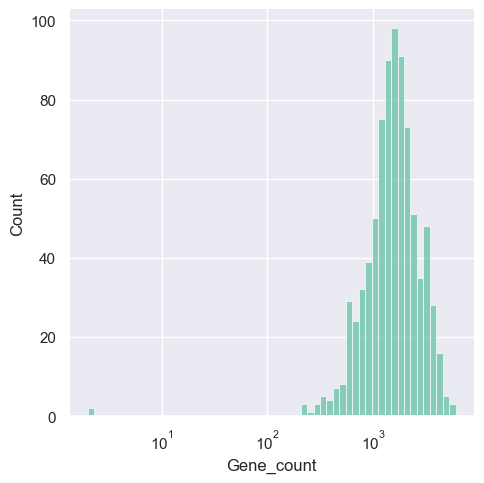

In [53]:
sns.displot(x='Gene_count', data = dj.filter(pl.col('Geneid')=='b1604').to_pandas(), 
            log_scale=[10,False],  common_norm=False, legend=True)

In [54]:
dj.filter(pl.col("Geneid") == "b3772").sort(pl.col("Gene_count")).head(20)

Geneid,Experiment,Gene_count,sample_id,study,project_id,condition_id,rep_id,contact,creator,run_date,Strain Description,Strain,Base Media,Carbon Source (g/L),Nitrogen Source (g/L),Electron Acceptor,Trace Element Mixture,Supplement,Temperature (C),pH,Antibiotic for selection,Culture Type,Growth Rate (1/hr),Evolved Sample,Isolate Type,Sequencing Machine,Additional Details,Biological Replicates,DOI,GEO,Published,SRX,Run,LibraryLayout,Platform
str,str,i64,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,i64,f64,str,str,f64,str,str,str,str,i64,str,str,i64,str,str,str,str
"""b3772""","""ecoli_00156""",4,"""ssw__glc_ac_glc2__1""","""Substrate-switching Evolution""","""ssw""","""glc_ac_glc2""",1,"""Troy Sandberg""","""Ying Hefner""","""4/18/17""","""Escherichia coli SSW_GLU_AC.9.…","""MG1655""","""M9""","""glucose(4)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture""",null,37,7.0,null,"""Batch""",0.9,"""Endpoint""","""Clonal""","""HiSeq 2000""","""SSW GLU AC A9 F92 I4""",1,"""doi.org/10.1128/AEM.00410-17""","""GSE97944""",1,"""SRX2744804""","""SRR5456735""","""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00726""",23,"""cck_pgi__pgi_ale2__1""","""CCK_pgi""","""cck_pgi""","""pgi_ale2""",1,"""Douglas McCloskey""","""Douglas McCloskey""",null,"""Escherichia coli CCK_PGI.2.107…","""GMOS""","""M9""","""glucose(4)""","""NH4Cl(1)""","""O2""","""sauer trace element mixture""",null,37,7.0,null,"""Batch""",null,"""Endpoint""","""Population""",null,null,2,null,null,1,null,null,"""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00094""",61,"""rpoB__wt_lb__1""","""RpoB Knock-in""","""rpoB""","""wt_lb""",1,"""Jose Utrilla""","""Jose Utrilla""","""12/18/13""","""Escherichia coli K-12 MG1655""","""MG1655""","""LB""",null,null,"""O2""",null,null,37,7.0,null,"""Batch""",1.42,"""No""",null,"""MiSeq""",null,2,"""doi.org/10.1016/j.cels.2016.04…","""GSE59377""",1,"""SRX651938""","""SRR1514291""","""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00365""",65,"""abx_media__rpmi_ctrl__1""","""AntibiotICA""","""abx_media""","""rpmi_ctrl""",1,"""Anand Sastry""","""Julia Xu""","""7/3/19""","""Escherichia coli K-12 MG1655""","""MG1655""","""RPMI+10%LB""",null,null,"""O2""",null,null,37,7.0,null,"""Batch""",null,"""No""",null,"""NextSeq""",null,2,null,null,0,null,null,"""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00372""",78,"""abx_media__rpmi_mero__2""","""AntibiotICA""","""abx_media""","""rpmi_mero""",2,"""Anand Sastry""","""Julia Xu""","""7/3/19""","""Escherichia coli K-12 MG1655""","""MG1655""","""RPMI+10%LB""",null,null,"""O2""",null,"""meropenem(32ug/mL)""",37,7.0,null,"""Batch""",null,"""No""",null,"""NextSeq""",null,2,null,null,0,null,null,"""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00098""",83,"""rpoB__rpoBE546V_lb__1""","""RpoB Knock-in""","""rpoB""","""rpoBE546V_lb""",1,"""Jose Utrilla""","""Jose Utrilla""","""12/18/13""","""Escherichia coli K-12 MG1655 r…","""MG1655""","""LB""",null,null,"""O2""",null,null,37,7.0,"""Kanamycin""","""Batch""",1.34,"""No""",null,"""MiSeq""",null,2,"""doi.org/10.1016/j.cels.2016.04…","""GSE59377""",1,"""SRX651942""","""SRR1514296""","""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00506""",86,"""tcs__wt_lb__2""","""Two Component Systems""","""tcs""","""wt_lb""",2,"""Katherine Decker""","""Julia Kleinmanns""","""8/29/19""","""Escherichia coli K-12 MG1655""","""MG1655""","""LB""",null,null,"""O2""",null,null,37,7.0,null,"""Batch""",null,"""No""",null,null,null,2,null,null,0,null,null,"""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00371""",89,"""abx_media__rpmi_mero__1""","""AntibiotICA""","""abx_media""","""rpmi_mero""",1,"""Anand Sastry""","""Julia Xu""","""7/3/19""","""Escherichia coli K-12 MG1655""","""MG1655""","""RPMI+10%LB""",null,null,"""O2""",null,"""meropenem(32ug/mL)""",37,7.0,null,"""Batch""",null,"""No""",null,"""NextSeq""",null,2,null,null,0,null,null,"""PAIRED""","""ILLUMINA"""
"""b3772""","""ecoli_00367""",90,"""abx_media__camhb_ctrl__1""","""AntibiotICA""","""abx_media""","""camh

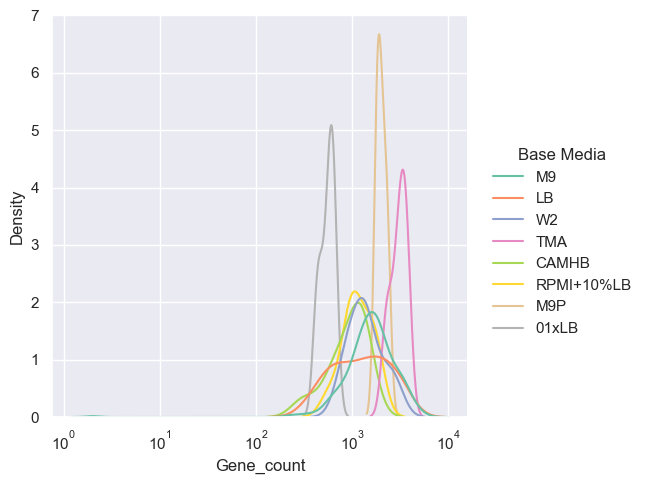

In [57]:
sns.displot(x='Gene_count', data = dj.filter(pl.col('Geneid')=='b1604').to_pandas(), 
            kind='kde', log_scale=[10,False], hue='Base Media', common_norm=False)

# Li 2014

In [10]:
li = pl.read_csv("external_data/Li_2014_profiling.csv")
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine
str,i64,i64,i64
"""aaeA""",62,5,21
"""aaeB""",16,2,0
"""aaeR""",203,79,141
"""aaeX""",28,5,11
"""aas""",188,80,162


In [18]:
li = li.with_columns( ( (pl.col("MOPS complete without methionine") + 10) / (10 + pl.col("MOPS complete"))).alias("dropout FC") )
li = li.with_columns( ( (pl.col("MOPS minimal") + 10) / (10 + pl.col("MOPS complete"))).alias("minimal FC") )
li.head(5)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""aaeA""",62,5,21,0.430556,0.208333
"""aaeB""",16,2,0,0.384615,0.461538
"""aaeR""",203,79,141,0.70892,0.41784
"""aaeX""",28,5,11,0.552632,0.394737
"""aas""",188,80,162,0.868687,0.454545


In [368]:
li.sort("dropout FC").tail(40)

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
"""gsiB""",71,574,686,8.592593,7.209877
"""ilvX""",102,972,1022,9.214286,8.767857
"""iaaA""",74,257,809,9.75,3.178571
"""metL""",972,581,9779,9.968432,0.601833
"""metC""",596,1256,7277,12.024752,2.089109
"""cysM""",473,1411,5838,12.10766,2.942029
"""iraD""",7,44,218,13.411765,3.176471
"""yeeD""",477,2008,6555,13.480493,4.143737
"""znuA""",3453,25238,57733,16.674271,7.290788


In [20]:
li.sum()

Gene,MOPS complete,MOPS minimal,MOPS complete without methionine,dropout FC,minimal FC
str,i64,i64,i64,f64,f64
null,18051444,5627623,10452920,9375.465686,6772.563954
